In [4]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
np.float = float
np.complex=complex
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
print('helo')

helo


In [5]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype=float)
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result=np.hstack((result, mel))
        return result

In [6]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [7]:
#DataFlair - Load the data and extract features for each sound file
def lod_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("G:\\speech_emo_rec\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [8]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=lod_data(test_size=0.25)

In [9]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))
print('f')

(576, 192)
f


In [10]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [11]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [12]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [13]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [14]:
def predict_emotion(file_path):
    # Extract features from the audio file
    feature = extract_feature(file_path, mfcc=True, chroma=True, mel=True)
    # Reshape the feature for prediction (assuming it's a single sample)
    feature = feature.reshape(1, -1)
    # Predict the emotion using the trained model
    emotion_pred = model.predict(feature)
    
    # Print predicted emotion
    print(f"Predicted Emotion: {emotion_pred[0]}")
    
    # Show dominant emotion plot (you can customize this based on your visualization preferences)
    # For example, you could use matplotlib to plot the dominant emotion or display it as text
    
# Example usage:
# file_path_to_test = "path_to_your_audio_file.wav"
# predict_emotion(file_path_to_test)


In [15]:
# File path to the audio file
file_path_to_test = "abc.wav"

# Call the function to predict emotion
predict_emotion(file_path_to_test)

Predicted Emotion: happy


In [16]:
from sklearn.metrics import classification_report


accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))
class_report=classification_report(y_true=y_test, y_pred=y_pred)
# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Print classification report
print(class_report)

Accuracy: 68.75%
              precision    recall  f1-score   support

        calm       0.92      0.58      0.71        57
     disgust       0.64      0.79      0.71        48
     fearful       0.62      0.84      0.71        37
       happy       0.64      0.60      0.62        50

    accuracy                           0.69       192
   macro avg       0.70      0.70      0.69       192
weighted avg       0.72      0.69      0.69       192



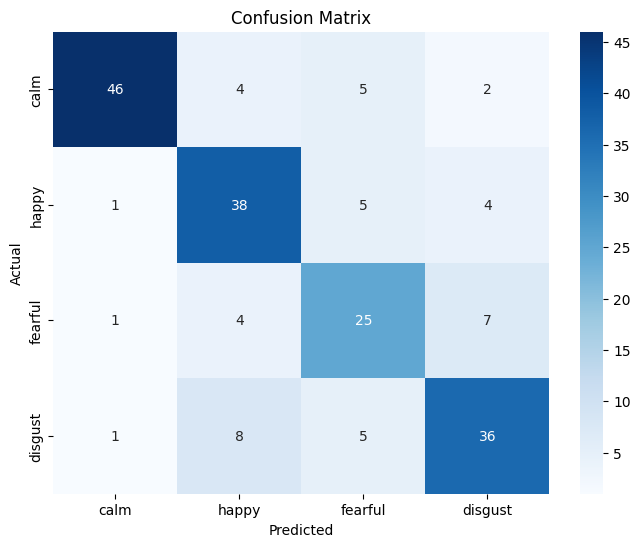

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train and x_test are your feature sets
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Now, train your model with the scaled data and obtain predictions
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=observed_emotions, yticklabels=observed_emotions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
